1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [27]:
import numpy as np
from scipy import linalg as la


'''
Generate a dataset with 3 features each with N entries (N being {O}(1000)).
With N(mu,sigma)the normali distribution with mean u sigma  standard deviation,
generate the 3 variables x_{1,2,3} such that:
    x_1 is distributed as N(0,1)
    x_2 is distributed as x_1+N(0,3)
    x_3 is given by 2x_1+x_2
'''
N = 1000
x_1 = np.random.normal(0.0, 1.0, N)
x_2 = x_1 + np.random.normal(0.0, 3.0, N)
x_3 = 2 * x_1 + x_2

In [28]:

# Find the eigenvectors and eigenvalues of the covariance matrix of the dataset

data = np.array([x_1, x_2, x_3])
cov_matrix = np.cov(data)   # interpret rows as variables
eigenvalues, eigenvectors = la.eig(cov_matrix)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues:
 [ 2.69217530e+01+0.j -1.59802465e-16+0.j  1.90744944e+00+0.j]
Eigenvectors:
 [[-0.11435856 -0.81649658  0.56591117]
 [-0.57873824 -0.40824829 -0.70597123]
 [-0.80745537  0.40824829  0.42585111]]


In [29]:
# Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result

U, S, Vt = la.svd(data)     # S = singular values, U = left singular vectors, Vt = right singular vectors

print("Singular values:\n", S)
print("Left singular vectors (U):\n", U)

# Compare the results from the two methods
D = np.zeros((len(data), N))
for i in range(min(len(data), N)):
    D[i, i] = S[i]
SVD = np.dot(U, np.dot(D, Vt))

print("Are the results from the two methods close enough?\t", np.allclose(SVD, data), "\n")


Singular values:
 [1.64007843e+02 4.36550320e+01 3.97412581e-14]
Left singular vectors (U):
 [[-0.11433803  0.56591532 -0.81649658]
 [-0.57876386 -0.70595023 -0.40824829]
 [-0.80743991  0.42588041  0.40824829]]
Are the results from the two methods close enough?	 True 



In [34]:
# What percent of the total dataset's variability is explained by the principal components?
# Given how the dataset was constructed, do these make sense? Reduce the dimensionality
# of the system so that at least 99% of the total variability is retained.

eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

sorted_eigenvalues = np.array([x[0] for x in eig_pairs])
sorted_eigenvectors = np.array([x[1] for x in eig_pairs])

# Calculate explained variance
total_variance = sum(sorted_eigenvalues)
var_exp = [(i / total_variance) * 100 for i in sorted_eigenvalues]
cum_var_exp = np.cumsum(var_exp)

print("Variance explained (%):", var_exp)
print("Variance explained cumulative (%):", cum_var_exp)

# Determine the number of dimensions to retain at least 99% of the variance
# Given how the dataset was constructed, this should be 2
# Find the index where cumulative variance exceeds or equals 99%
k = np.argmax(cum_var_exp >= 99.0) + 1
print(f"\nNumber of dimensions to retain at least 99% variance: {k}")


Variance explained (%): [np.float64(93.38362050144002), np.float64(6.616379498559982), np.float64(5.543076169739783e-16)]
Variance explained cumulative (%): [ 93.3836205 100.        100.       ]

Number of dimensions to retain at least 99% variance: 2


In [ ]:
# Redefine the data in the basis yielded by the PCA procedure

# Matrix of the top k eigenvectors (principal components)
W = sorted_eigenvectors[:, :k]

# Proiection of the data onto the new subspace
# data_pca will have dimensions (k, N) -> (2, 1000)
data_pca = W.T.dot(data)

print("Dimensione dati originali:", data.shape)
print("Dimensione dati PCA:", data_pca.shape)

Dimensione dati originali: (3, 1000)
Dimensione dati PCA: (2, 1000)


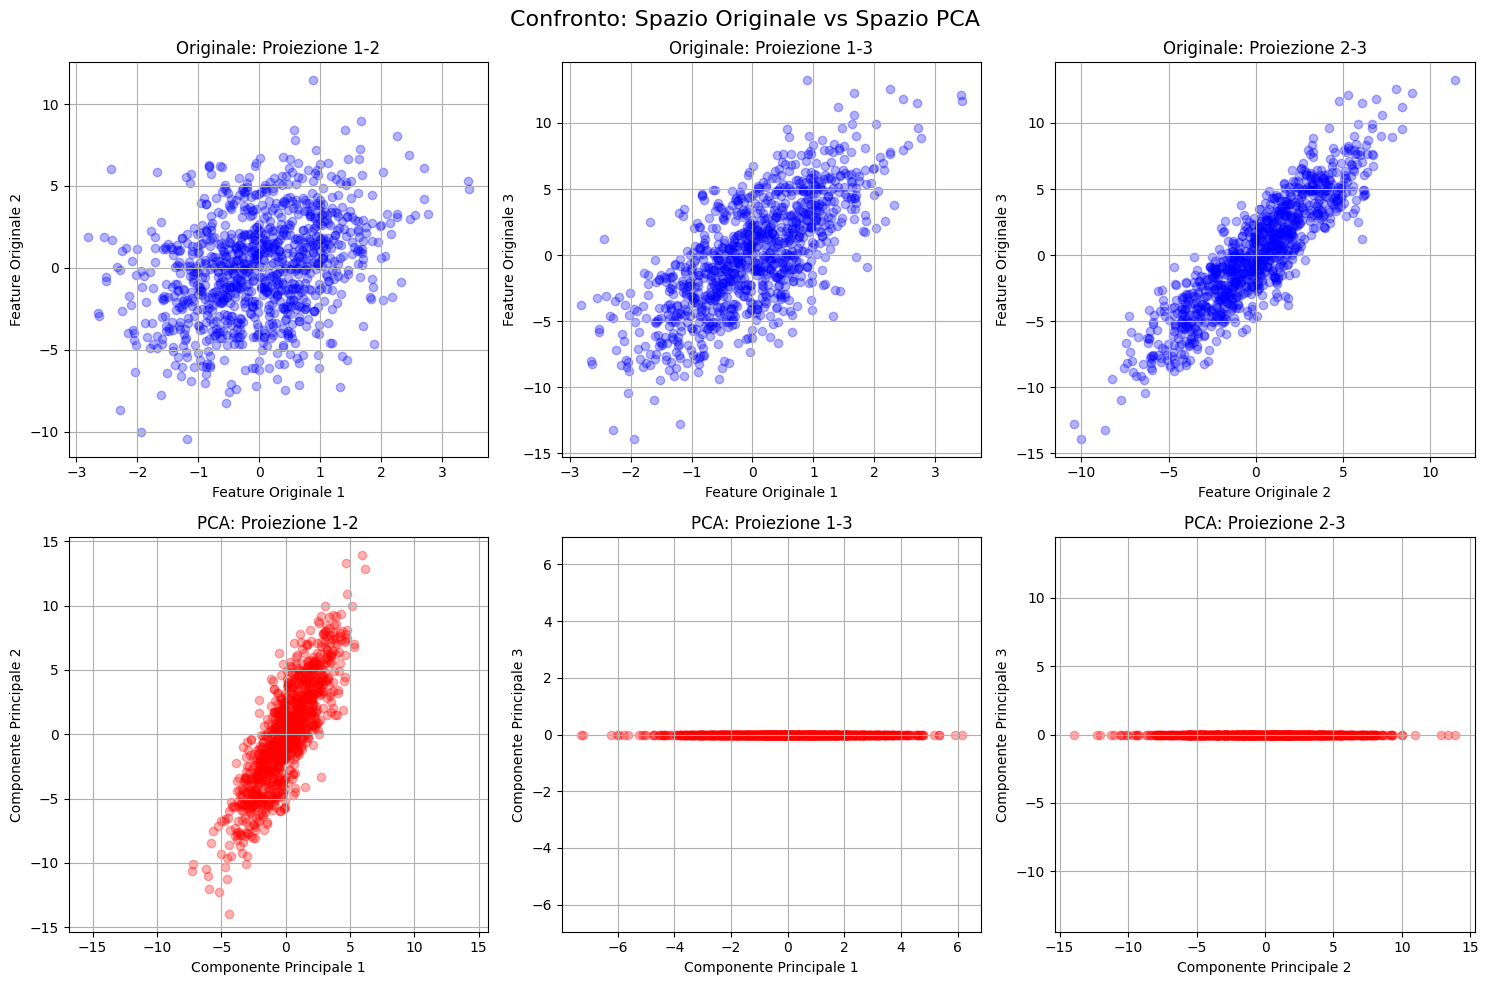

In [33]:
# Plot the data points in the original and the new coordiantes as a set of scatter plots.
# Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

import matplotlib.pyplot as plt

# Creiamo una versione 3D dei dati PCA aggiungendo una riga di zeri per la 3^ componente
# (che abbiamo scartato perché ininfluente) per poter fare i confronti 1-2 e 0-2
data_pca_3d = np.vstack([data_pca, np.zeros((1, data.shape[1]))])

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Confronto: Spazio Originale vs Spazio PCA', fontsize=16)

# Definiamo le coppie di indici da plottare: (0,1), (0,2), (1,2)
pairs = [(0, 1), (0, 2), (1, 2)]
labels = ['x', 'y', 'z']

# Plot Dati Originali (Prima Riga)
for i, (dim1, dim2) in enumerate(pairs):
    axes[0, i].scatter(data[dim1, :], data[dim2, :], alpha=0.3, c='blue')
    axes[0, i].set_xlabel(f'Feature Originale {dim1+1}')
    axes[0, i].set_ylabel(f'Feature Originale {dim2+1}')
    axes[0, i].set_title(f'Originale: Proiezione {dim1+1}-{dim2+1}')
    axes[0, i].grid(True)

# Plot Dati PCA (Seconda Riga)
for i, (dim1, dim2) in enumerate(pairs):
    axes[1, i].scatter(data_pca_3d[dim1, :], data_pca_3d[dim2, :], alpha=0.3, c='red')
    axes[1, i].set_xlabel(f'Componente Principale {dim1+1}')
    axes[1, i].set_ylabel(f'Componente Principale {dim2+1}')
    axes[1, i].set_title(f'PCA: Proiezione {dim1+1}-{dim2+1}')
    axes[1, i].grid(True)
    
    # Impostiamo limiti uguali per vedere meglio l'appiattimento
    axes[1, i].axis('equal')

plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 